# Assignment 8

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).

---

#### ``Objectives``
1. Implement K-means clustering

#### ``Motivation``

[The RGB color model](https://en.wikipedia.org/wiki/RGB_color_model) is an additive color model in which the red, green, and blue primary colors of light are added together in various ways to reproduce a broad array of colors. 

There are plenty of RGB-to-color converters on the web 
https://www.rapidtables.com/convert/color/rgb-to-hex.html

These two RGB triples look almost identical to the human eye:
- [0, 0, 255]
- [0, 1, 255]

However there is no "reverse lookup" that tells you that "this color is close to blue" unless it is a [basic](https://en.wikipedia.org/wiki/Web_colors#Basic_colors) or [extended](https://en.wikipedia.org/wiki/Web_colors#Extended_colors) color with a specified RGB value.

#### ``Data``

For this assignment you are provided a file with RGB triples.

### Import libraries

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import sys
import os

---
### Step 1: Data ingestion

The RGB color data we will import was sourced from a collection of digital ad images. The project's objective was to determine if certain colors were indicative of high-performing ads.

Before creating a predictive model, it was essential to classify the colors of the RGB triples present in the images.

It's important to note that if the color values were uniformly distributed, clustering would not provide any valuable insights.

In [2]:
# read data
data_file = "./HW08_rgb_colors.csv"
df_colors = pandas.read_csv(data_file)

#### <span style="color:chocolate"> Exercise 1:</span> Getting to know the data (10 points)

Answer the following questions:
    
1. How many columns does the dataset contain?
2. How many rows are there in the dataset?
3. What are the column names?
4. Print the first five examples in the dataset.

In [3]:
# YOUR CODE HERE

# 1) data has 3 columns
df_colors.shape[1]

3

In [4]:
# 2) data has 2030 rows
df_colors.shape[0]

2030

In [5]:
# 3) 
df_colors.columns

Index(['red', 'green', 'blue'], dtype='object')

In [6]:
# 4)
df_colors.head(5)

,red,green,blue
0,233,197,146
1,183,97,58
2,188,84,7
3,247,252,254
4,248,253,253


---
### Step 2: Exploratory Data Analysis (EDA)

#### <span style="color:chocolate"> Exercise 2:</span> 3D plot of RGB colors (10 points)

To visually confirm that similar colors are located close to each other in the 3-dimensional RGB space:

1. Use the <span style="color:chocolate"> matplotlib</span> library to plot the RGB components and verify this relationship (use the colors array defined below to specify the color for each data point).

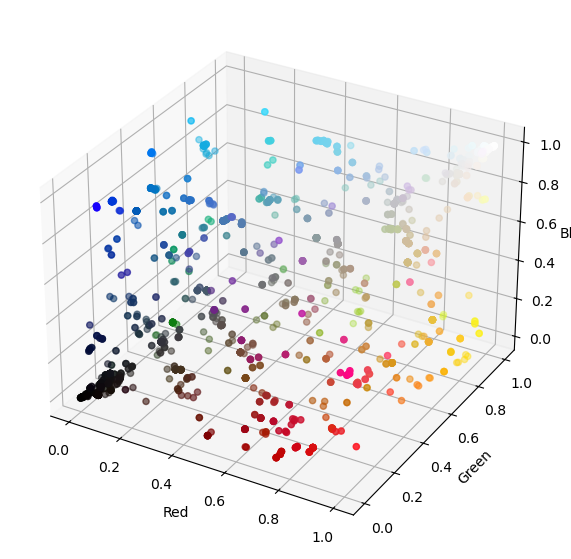

In [7]:
# define colors
colors = np.array(df_colors.values)/255 # colors need to be (r,b,g) tuple in the range of 0-1

# create the 3D scatter plot
## YOUR CODE HERE ##
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Extract the RGB components
r = colors[:, 0]
g = colors[:, 1]
b = colors[:, 2]

# Plot the RGB colors in 3D
ax.scatter(r, g, b, c=colors, marker='o')

# Set labels for axes
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

# Show the plot
plt.show()

---
### Step 3: Clustering algorithm

Clustering algorithms are essential tools for exploring and understanding data patterns without prior knowledge of labels or categories. In this assignment, we will explore the KMeans clustering algorithm.

#### <span style="color:chocolate"> Exercise 3:</span> KMeans (10 points)

1. Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">fit_kmeans()</span> function below.

2. Fit a KMeans model with 10 clusters. Make sure to pass the random_state argument;

3. Use the <span style="color:chocolate"> predict() </span> method to get the cluster predictions for each data point;
   
5. Add the cluster predictions to the <span style="color:chocolate"> df_colors </span> dataframe. 

In [8]:
# set params
n_clusters = 10
random_state = 10  # makes sure you get the same results each time

# create a np array for RBG values
X = np.array(df_colors.values)

# define KMeans model
def fit_kmeans(X, n_clusters, random_state):
    """ Initialize, fit, and return a kmeans model. """
    model = KMeans(n_clusters = n_clusters, random_state = random_state)
    model.fit(X)
    return model

# fit KMeans model
km_model = fit_kmeans(X, n_clusters=10, random_state=1)

# get cluster predictions
predictions = km_model.predict(X)

# add predictions to df_colors
df_colors['cluster'] = predictions

# print a sample of new df
df_colors.head()

,red,green,blue,cluster
0,233,197,146,1
1,183,97,58,9
2,188,84,7,3
3,247,252,254,4
4,248,253,253,4


---
### Step 4: Statistics

#### <span style="color:chocolate"> Exercise 4:</span> Distribution of clusters (10 points)

1. Analyze the distribution of clusters using a histogram plot. Set the numbers of bins to 10.
2. Ensure that your visual representation aligns with the results obtained from
<span style="color:chocolate"> df_colors['cluster'].value_counts()</span>.

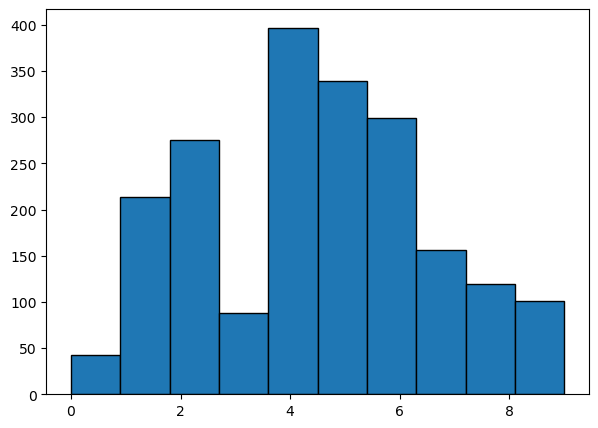

In [9]:
# YOUR CODE HERE

plt.figure(figsize=(7,5))
plt.hist(x=df_colors.cluster, bins=10, edgecolor='black', label=[str(i) for i in range(0, 10)])

plt.show()

In [10]:
df_colors.cluster.value_counts().sort_index()

cluster
0     42
1    214
2    275
3     88
4    397
5    339
6    299
7    156
8    119
9    101
Name: count, dtype: int64

In [11]:
df_colors

,red,green,blue,cluster
0,233,197,146,1
1,183,97,58,9
2,188,84,7,3
3,247,252,254,4
4,248,253,253,4
...,...,...,...,...
2025,27,123,141,2
2026,194,193,198,1
2027,41,113,197,2
2028,35,114,197,2


#### <span style="color:chocolate"> Exercise 5:</span> Distribution of colors by cluster (10 points)

Plot the color distribution for each cluster using the first 500 examples in the <span style="color:chocolate"> df_colors</span> data.
 - ensure clusters are on the y-axis and the first 500 examples are on the x-axis.
 - use the **mini_colors** array provided below for the color argument in the plot function.


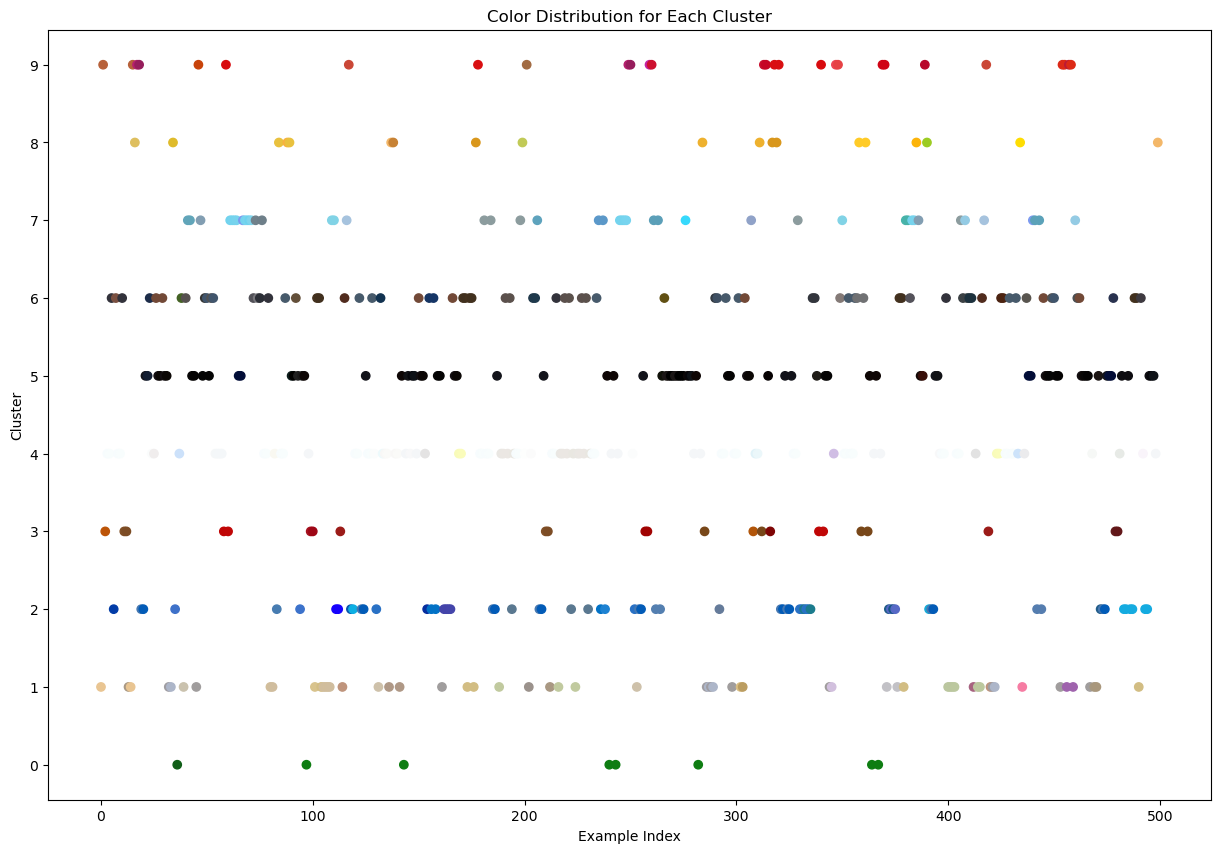

In [12]:
# define colors
mini_colors = colors[:500]

# YOUR CODE HERE

# subset the colors dataset
df_subset = df_colors.iloc[:500]

# Plot the color distribution for each cluster
plt.figure(figsize=(15, 10))

for cluster in df_subset['cluster'].unique():
    cluster_data = df_subset[df_subset['cluster'] == cluster]
    cluster_indices = cluster_data.index
    cluster_colors = mini_colors[cluster_indices]

    plt.scatter(cluster_indices, [cluster] * len(cluster_indices), c=cluster_colors)


# Set labels and title
plt.xlabel('Example Index')
plt.ylabel('Cluster')
plt.title('Color Distribution for Each Cluster')
plt.yticks(range(10))

plt.show()


#### <span style="color:chocolate"> Exercise 6:</span> Cluster centroids (10 points)

Retrieve the centroids of each cluster using the <span style="color:chocolate"> cluster_centers_</span> attribute of the fitted KMeans object.

In [13]:
# YOUR CODE HERE
centroids = km_model.cluster_centers_
centroids

array([[ 13.4047619 , 126.71428571,  32.26190476],
       [191.99069767, 179.61395349, 158.89767442],
       [ 33.49818182, 108.72363636, 187.33090909],
       [150.56818182,  36.98863636,  20.53409091],
       [244.22670025, 246.83627204, 246.32493703],
       [ 13.87905605,  12.35693215,  16.14454277],
       [ 75.30100334,  70.73578595,  71.02675585],
       [116.43870968, 182.43225806, 202.48387097],
       [224.60504202, 181.31092437,  42.06722689],
       [205.        ,  36.42574257,  57.71287129]])

Next, let's **create a color dictionary** to give color names to each centroid. You will need this dictionary to solve Exercise 7-8.

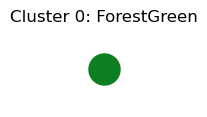

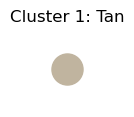

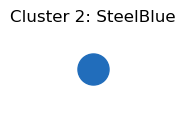

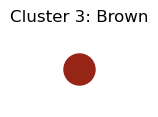

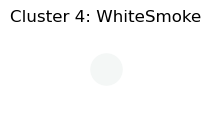

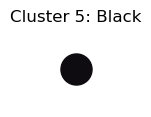

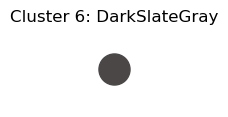

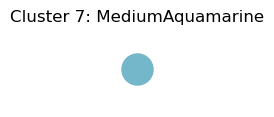

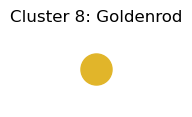

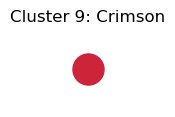

In [14]:
# get the current directory of the script
current_script_dir = os.path.abspath(os.getcwd())

# navigate one directory forward
next_dir = os.path.join(current_script_dir, 'data/RGB_colors/')

# add next_dir to sys.path to make it the current working directory
sys.path.insert(0, next_dir)

# import HW08_color_names.py
import HW08_color_names  

# get closer name for rgb
color_dict = HW08_color_names.get_closest_name_for_rgb(centroids)

# def show_color() function
def show_color(test_color, title):
  # normalize 
  c = [ cc/255 for cc in test_color]  

  # some random coordinates
  x = [1]
  y = [1]

  # plot a large dot
  fig = plt.figure(figsize=(1, 1))
  plt.scatter(x,y,color=c,s=500)
  plt.title(title)
  plt.axis('off')
  return(plt)

# call show_color() function
for cluster in range(n_clusters):
    show_color(centroids[cluster],f'Cluster {cluster}: {color_dict[cluster]}')

In [15]:
color_dict

['ForestGreen',
 'Tan',
 'SteelBlue',
 'Brown',
 'WhiteSmoke',
 'Black',
 'DarkSlateGray',
 'MediumAquamarine',
 'Goldenrod',
 'Crimson']

---
### Step 5: Test examples

#### <span style="color:chocolate"> Exercise 7:</span> Best guess for an RGB triple based on centroids (20 points)

Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">guess_color()</span> function below to determine the closest centroid to a user-defined RGB triple (test example) without using the <span style="color:chocolate">KMeans.predict()</span> method. 

The function will calculate distances using the Euclidean distance formula and return the color associated with the nearest centroid.

In [16]:
import math 

# your color guessing function
def guess_color(centroids, color_dict, test_color) -> str:
    """ 
    Determine closest centroid to the given rgb triple 
    """

    # initialize distance with an impossibly high value
    shortest_dist = 10000 
    closest_color = "COLOR NOT FOUND"

    for index, center_coords in enumerate(centroids):
        # Calculate the euclidean distance between test_color and each centroid coordinate
        red_dist   = (test_color[0] - center_coords[0]) ** 2
        green_dist = (test_color[1] - center_coords[1]) ** 2
        blue_dist  = (test_color[2] - center_coords[2]) ** 2
        dist = (red_dist + green_dist + blue_dist) ** 0.5
        
        if (dist < shortest_dist):
            shortest_dist = dist
            closest_color = color_dict[index]

    return closest_color


# user-defined RGB triple
color1 = [200, 5, 5]  # approximately red 

# call the guess_color() function
guess_color(centroids=centroids, color_dict=color_dict, test_color=color1)

'Brown'

#### <span style="color:chocolate"> Exercise 8:</span> Best guess for an RGB triple based on centroids (20 points)

Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">guess_color()</span> function below to determine the closest centroid to a user-defined RGB triple (test example) by using the <span style="color:chocolate">KMeans.predict()</span> method.

In [17]:
def predict_color(model, color_dict, test_color):
    # reshape test_color so it can be used as an input to model predict
    test_color_np = np.array(test_color).reshape(1, -1) 

    # get the predicted class
    color_index = model.predict(test_color_np)[0] 

    # get the predicted color name
    color_name = color_dict[color_index] 
    
    return color_name

# user-defined RGB triple
color1 = [200, 5, 5] # approximately red 

# call the guess_color() function
predict_color(model=km_model, color_dict=color_dict, test_color=color1)

'Brown'